---
title: "Midterm Project"
author: "Alyssa Horn"
toc: true
number-sections: true
self-contained: true
highlight-style: pygments
format: 
  html: 
    code-fold: true
    html-math-method: katex
  pdf: 
    geometry: 
      - top=30mm
      - left=20mm
---


## Notes
* Cleaning
    * missing zipcode not as big an issue for this dataset
* Exploration
    * Use leaflet like the homework but using different symbols
    * response time - someone needs to look at it and close it - from created date to closed date
    * 2 descriptors: SF and CB. Might want to do the comparison by borough. These are right skewed data. Might need to use a different scale?
    * hypothesis tests
      * Difference in borough: 2-way ANOVA, justify whatever test used
    * Binary variable: should be similar to what we have in iii
* Modeling the count
    * i. should get 174
    * Use zipcode as key to merge
    * lag: maybe if there is more rain - then there are more complaints the next day?
    * Neg binomial is def better because mean and variance do not need to be the same

# Data Cleaning

## Import the data, rename the columns with our preferred styles.

In [1]:
import pandas as pd

# Load data
file_path = "nycflood2024.csv" 
df = pd.read_csv(file_path)

# Rename columns
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,63574884,12/31/2024 11:05:00 PM,01/01/2025 05:55:00 AM,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11434.0,177-37 135 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675681,-73.762969,"(40.67568056757403, -73.76296916912234)"
1,63580185,12/31/2024 11:02:00 PM,01/01/2025 10:30:00 AM,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11219.0,4102 14 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.638098,-73.985346,"(40.63809797146557, -73.98534616586583)"
2,63573084,12/31/2024 11:02:00 PM,01/01/2025 06:20:00 AM,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11361.0,35-34 CORPORAL KENNEDY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767455,-73.778079,"(40.767454543462755, -73.77807940403599)"
3,63581809,12/31/2024 10:35:00 PM,01/01/2025 11:20:00 AM,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11219.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636495,-73.987000,"(40.636495214873584, -73.98700030399515)"
4,63578460,12/31/2024 10:11:00 PM,01/02/2025 12:45:00 PM,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,10305.0,225 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.612337,-74.069589,"(40.612337196854604, -74.06958876337421)"


## Summarize the missing information. Are there variables that are close to completely missing?

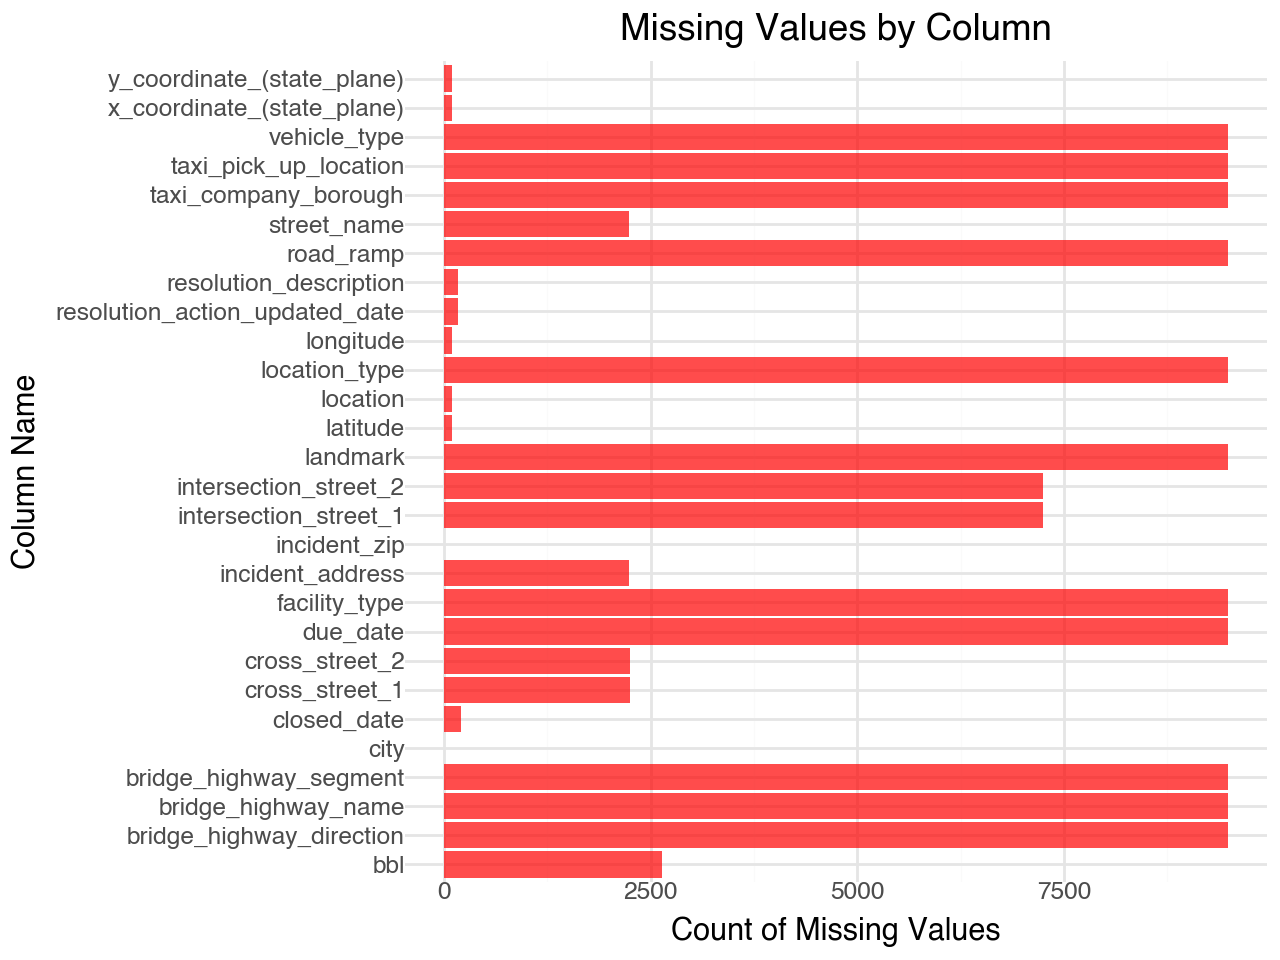

In [2]:
# Check for missing values
missing_summary = df.isnull().sum()

from plotnine import ggplot, aes, geom_bar, theme_minimal, coord_flip, labs
import pandas as pd

# Check missing values
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ["Column", "Missing_Count"]
missing_summary = missing_summary[missing_summary["Missing_Count"] > 0]  # Only show columns with missing values
missing_summary = missing_summary.sort_values(by="Missing_Count", ascending=False)

# Create a bar plot
missing_plot = (
    ggplot(missing_summary, aes(x="Column", y="Missing_Count"))
    + geom_bar(stat="identity", fill="red", alpha=0.7)
    + coord_flip()  # Flip for better readability
    + theme_minimal()
    + labs(title="Missing Values by Column", x="Column Name", y="Count of Missing Values")
)

missing_plot

In [3]:
missing_summary = df.isnull().sum()

# Find columns with missing values over 80%
high_missing = missing_summary[missing_summary / len(df) > 0.8]

high_missing

location_type               9483
landmark                    9483
facility_type               9483
due_date                    9483
vehicle_type                9483
taxi_company_borough        9483
taxi_pick_up_location       9483
bridge_highway_name         9483
bridge_highway_direction    9483
road_ramp                   9483
bridge_highway_segment      9483
dtype: int64

## Are there redundant information in the data? Try storing the data using the Arrow format and comment on the efficiency gain.

In [4]:
# Drop redundant location column since we have longitude and latitude
df = df.drop(columns=['location'])

# Drop redundant location column since we address
df = df.drop(columns=['street_name'])

# Drop redundant location column since we have agency
df = df.drop(columns=['agency_name'])

# Drop redundant location column since we have borough
df = df.drop(columns=['park_borough'])

df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'complaint_type',
       'descriptor', 'location_type', 'incident_zip', 'incident_address',
       'cross_street_1', 'cross_street_2', 'intersection_street_1',
       'intersection_street_2', 'address_type', 'city', 'landmark',
       'facility_type', 'status', 'due_date', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_(state_plane)', 'y_coordinate_(state_plane)',
       'open_data_channel_type', 'park_facility_name', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
import pyarrow.feather as feather
import os

# Save dataset in Feather format
feather_file = "nycflood2024.feather"
df.to_feather(feather_file)

# Compare file sizes
csv_size = os.path.getsize(file_path)
feather_size = os.path.getsize(feather_file)
compression_gain = (1 - feather_size / csv_size) * 100

print(f"CSV file size: {csv_size / 1024:.2f} KB")
print(f"Feather file size: {feather_size / 1024:.2f} KB")
print(f"Compression Efficiency Gain: {compression_gain:.2f}%")

CSV file size: 5962.98 KB
Feather file size: 1465.19 KB
Compression Efficiency Gain: 75.43%


## Are there invalid NYC zipcode or borough? Can some of the missing values be filled? Fill them if yes.

In [6]:
import numpy as np
from geopy.geocoders import Nominatim
import time

# Check co-occurring missing values
missing_cooccur = df[['incident_zip', 'borough']].isnull().all(axis=1).sum()
total_missing_zip_code = df['incident_zip'].isnull().sum()
total_missing_borough = df['borough'].isnull().sum()

print("Missing Zip & Borough Together:", missing_cooccur)
print("Total Missing Zip Codes:", total_missing_zip_code)
print("Total Missing Boroughs:", total_missing_borough)

Missing Zip & Borough Together: 0
Total Missing Zip Codes: 4
Total Missing Boroughs: 0


In [8]:
# Filter rows where zip_code (incident_zip) is missing but borough is present
missing_zip_present_borough = df[df['incident_zip'].isna() & df['borough'].notna()][['incident_zip', 'borough']]

# Display the first few rows
missing_zip_present_borough


,incident_zip,borough
58,NaN,QUEENS
189,NaN,MANHATTAN
1903,NaN,MANHATTAN
6333,NaN,QUEENS


Since these four columns that have missing zip code also have missing longitude and latitude, they cannot be filled using geocoders. Borough is not missing, however, there are several zip codes pertaining to each borough so we are unable to tell which zip code the incident belongs to. I filled the zip code with the most common zip from incidents with the same borough:

In [9]:
# Most common Zip in each borough
most_common_zip_by_borough = df.groupby('borough')['incident_zip'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing with most common borough zip
missing_zip = df['incident_zip'].isna() & df['borough'].notna()
df.loc[missing_zip, 'incident_zip'] = df.loc[missing_zip, 'borough'].map(most_common_zip_by_borough)

# Check how many still missing
missing_after = df['incident_zip'].isna().sum()
print("Missing zip codes AFTER fill:", missing_after)


Missing zip codes AFTER fill: 0


## Are there date errors? Examples are earlier closed_date than created_date; closed_date and created_date matching to the second; dates exactly at midnight or noon to the second.

In [15]:
# closed_date is earlier than created_date
date_errors = df[df['closed_date'] < df['created_date']]
print(f"Rows where closed_date is earlier than created_date: {len(date_errors)}")

# closed_date and created_date match exactly
same_second = df[df['created_date'] == df['closed_date']]
print(f"Rows where created_date == closed_date: {len(same_second)}")

# created_date is exactly at midnight or noon
midnight_noon = df[df['created_date'].dt.strftime("%H:%M:%S").isin(["00:00:00", "12:00:00"])]
print(f"Rows with created_date exactly at midnight or noon: {len(midnight_noon)}")

# missing created_date or closed_date
missing_created = df['created_date'].isna().sum()
missing_closed = df['closed_date'].isna().sum()
print(f"Missing created_date: {missing_created}")
print(f"Missing closed_date: {missing_closed}")

# complaints open for an unusually long time (over a year)
long_open_cases = df[(df['closed_date'].notna()) & ((df['closed_date'] - df['created_date']).dt.days > 365)]
print(f"Cases open for more than a year: {len(long_open_cases)}")

# cases where dates are too old or in future
too_old = df[df['created_date'] < pd.Timestamp("2010-01-01")]
too_future = df[df['closed_date'] > pd.Timestamp.today()]
print(f"Rows with created_date before 2010: {len(too_old)}")
print(f"Rows with closed_date in the future: {len(too_future)}")


Rows where closed_date is earlier than created_date: 1
Rows where created_date == closed_date: 160
Rows with created_date exactly at midnight or noon: 0
Missing created_date: 0
Missing closed_date: 208
Cases open for more than a year: 0
Rows with created_date before 2010: 0
Rows with closed_date in the future: 0


## Summarize your suggestions to the data curator in several bullet points.

* Remove redundant columns.
    * Some columns like location, stree_name, park_borough, and agency_name are redundant of other columns and do not need to be included in the dataset. 
* Address missing or incorrect dates.
    * Some rows include closed dates eariler than created dates.
    * There are rows that have equal close and open dates and times - indicating an entry error/default.
    * There are rows that have missing closed dates, meaning some may have been left open or not updated in teh database.
* Store data more efficiently
    * The curator should consider storing the data in feather format for better performance and 